In [1]:
import cv2
import numpy as np 


In [2]:
def canny(image):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    canny=cv2.Canny(blur,50,150)
    return canny


    
    

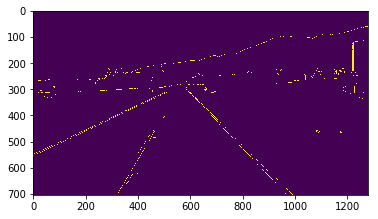

In [5]:
import matplotlib.pyplot as plt
canny=canny(lane_image)
plt.imshow(canny)
plt.show()

In [3]:
def region(image):
    height=image.shape[0]
    polygons=np.array([[(200,height),(1100,height),(550,250)]])
    mask=np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    img_wise=cv2.bitwise_and(image,mask)
    return img_wise  

In [10]:
 lines=cv2.HoughLinesP(x,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)

In [4]:
def display(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(100,255,0),10)
    return line_image
    
            

    


In [5]:
def average_slope(image,lines):
    left=[]
    right=[]
    for line in lines:
        x1,y1,x2,y2=line.reshape(4) 
        param=np.polyfit((x1,x2),(y1,y2),1 )
        slope=param[0]
        intersection=param[1]
        if slope<0:
            left.append((slope,intersection))
        else:
            right.append((slope,intersection))
    left_average=np.average(left,axis=0)
    right_average=np.average(right,axis=0)
    left_line=make_coordinates(image,left_average)
    right_line=make_coordinates(image,right_average)
    return np.array([left_line ,right_line])
                
        
        
    

In [6]:
def make_coordinates(image,line_parameters):
    slope,intersection=line_parameters
    y1=image.shape[0]
    y2=int(y1*(3/5))
    x1=int((y1-intersection)/slope)
    x2=int((y2 -intersection)/slope)

    return np.array([x1,y1,x2,y2])

In [9]:
cap=cv2.VideoCapture("13.1 test2.mp4.mp4")
print(cap.isOpened())
while(cap.isOpened()):
    _,frame=cap.read()
    canny=canny(frame)
    x=region(canny)
    lines=cv2.HoughLinesP(x,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
    average_lines=average_slope(frame,lines)
    display1=display(frame,average_lines)

    z=cv2.addWeighted(frame,.8,display1,1,1)
    cv2.imshow("rowe",z)
    if cv2.waitKey(1)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
        


True


TypeError: 'numpy.ndarray' object is not callable

In [10]:
cap=cv2.VideoCapture("13.1 test2.mp4.mp4")
print(cap.isOpened())
while(cap.isOpened()):
    _,frame=cap.read()
    canny=canny(frame)
    x=region(canny)
    lines=cv2.HoughLinesP(x,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
    average_lines=average_slope(frame,lines)
    display1=display(frame,average_lines)

    z=cv2.addWeighted(frame,.8,display1,1,1)
    cv2.imshow("rowe",z)
    if cv2.waitKey(1)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
        


True


TypeError: 'numpy.ndarray' object is not callable